In [98]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [99]:
# import fake Self-Sufficiency Matrix data

SSM_df = pd.read_csv('/Users/amykerdolff/Documents/Documents/Visual Studio Code/Plotting practice/SSM_data.csv')
print(SSM_df)

   Customer ID Full Name Assessment Date  Score
0         4598  Jane Doe          2/8/22     45
1         4598  Jane Doe         7/17/22     57
2         4598  Jane Doe         3/15/23     72
3         4598  Jane Doe         1/22/24     88


[Text(0.5, 1.0, "Jane Doe's SSM Score Over Time")]

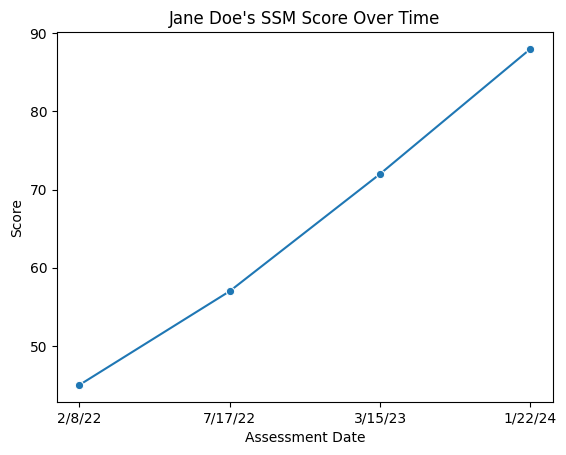

In [100]:
# SSM data line graph

sns.lineplot(data = SSM_df, x = 'Assessment Date', y = 'Score', marker='o').set(title="Jane Doe's SSM Score Over Time")


In [101]:
 # import fake customer demographics

Demographics_df = pd.read_excel('/Users/amykerdolff/Documents/Documents/Visual Studio Code/Plotting practice/Demographic_data.xlsx')
print(Demographics_df)

   Customer ID First Name Last Name     Gender                       Race  \
0            1       Jane       Doe     Female                      White   
1            2        Bob   Johnson       Male  Black or African American   
2            3       Jill  Williams     Female                      Asian   
3            4       Toni     Smith  Nonbinary                      White   
4            5  Stephanie  Anderson     Female  Black or African American   
5            6    Melissa     Brown     Female                      White   
6            7    Allison    Burton     Female                      White   
7            8      Peggy     Baker     Female          Native/Indigenous   
8            9      Sarah    Truman     Female                      White   
9           10      James    Fields       Male                      White   

  Highest Level of Education   Employment Status  Monthly Household Income  \
0                High School      Unable to work                         0

<Axes: title={'center': 'Number of Customers by Highest Level of Education'}, ylabel='Highest Level of Education'>

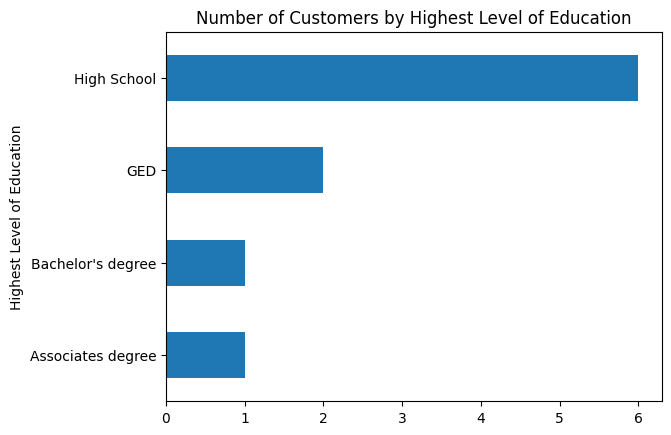

In [102]:
# Bar graph of highest level of education

grouped_highest_level_ed_df = Demographics_df.groupby('Highest Level of Education')['Customer ID'].nunique()
grouped_highest_level_ed_df.plot(kind='barh', title = 'Number of Customers by Highest Level of Education')

<Axes: xlabel='Household Size', ylabel='Monthly Household Income'>

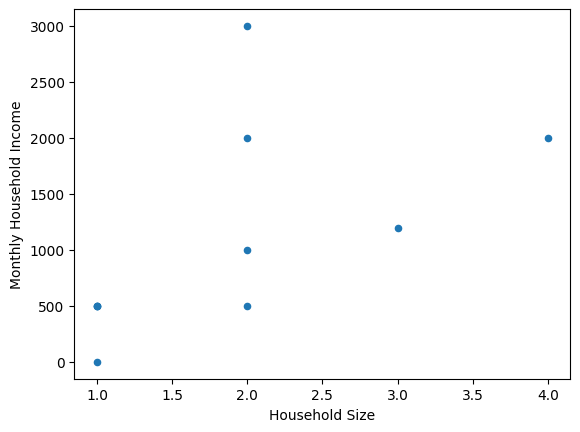

In [103]:
# Scatter plot

Demographics_df.plot(kind= 'scatter', x = 'Household Size', y = 'Monthly Household Income')